# Tarea 2: Análisis Completo de un Dataset con Benchmark de Algoritmos de Machine Learning

## Curso: Aprendizaje Automático - Ciencia de Datos

## Prof. Dr.Ing. Felipe Meza-Obando

### Estudiantes

   - Roberto Baltodano

   - Sergio Blanco


## Parte 1 - Seleccion del dataset
https://archive.ics.uci.edu/dataset/186/wine+quality

### Descripcion del conjunto de datos:
2 datasets que contienen resultados de pruebas para el Vinho Verde de Portugal y sus resultados fisico-quimicos.

### Características del dataset
- Cantidad de columnas: 12
- Cantidad de filas: 6497
- Tiene valores faltantes? No



In [1]:
# Correr esto solo la primera vez en su venv
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install polars
%pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Importación del dataset - Cargando datasets separados para incluir información de color
import pandas as pd
import numpy as np

# URLs de los datasets originales separados
red_wine_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
white_wine_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"

# Cargar datasets separados
print("Cargando dataset de vinos tintos...")
red_wine_data = pd.read_csv(red_wine_url, sep=';')
red_wine_data['color'] = 'red'
print(f"Vinos tintos cargados: {len(red_wine_data)} muestras")

print("\nCargando dataset de vinos blancos...")
white_wine_data = pd.read_csv(white_wine_url, sep=';')
white_wine_data['color'] = 'white'
print(f"Vinos blancos cargados: {len(white_wine_data)} muestras")

# Combinar ambos datasets
wine_data = pd.concat([red_wine_data, white_wine_data], ignore_index=True)
print(f"\nDataset combinado: {len(wine_data)} muestras totales")

# Separar características y target para compatibilidad con código existente
X = wine_data.drop(['quality', 'color'], axis=1)
y = wine_data[['quality']]

# Mostrar información del dataset
print("\nInformación del dataset combinado:")
print(f"Forma del dataset: {wine_data.shape}")
print(f"Columnas: {list(wine_data.columns)}")
print(f"\nDistribución por color:")
print(wine_data['color'].value_counts())


Cargando dataset de vinos tintos...
Vinos tintos cargados: 1599 muestras

Cargando dataset de vinos blancos...
Vinos blancos cargados: 4898 muestras

Dataset combinado: 6497 muestras totales

Información del dataset combinado:
Forma del dataset: (6497, 13)
Columnas: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'color']

Distribución por color:
color
white    4898
red      1599
Name: count, dtype: int64


In [4]:
# Importación de librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import polars as pl

%matplotlib inline

# El dataset ya está combinado con la columna color incluida
# wine_data ya contiene todas las columnas incluyendo 'color'

print(f"\nForma del dataset: {wine_data.shape}")
print(f"Columnas: {list(wine_data.columns)}")

# Mostrar las primeras filas
print("\nPrimeras 5 filas del dataset:")
wine_data.head()


Forma del dataset: (6497, 13)
Columnas: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'color']

Primeras 5 filas del dataset:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


### Carga del Archivo

#### Con Pandas

In [4]:
# Información básica del dataset
print("Información del dataset:")
print(wine_data.info())
print("\n" + "="*50)
print("Estadísticas descriptivas:")
print(wine_data.describe())

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB
None

Estadísticas descriptivas:
     

### Con Polars

In [5]:
# Convertir a Polars DataFrame
wine_data_pl = pl.from_pandas(wine_data)

# Mostrar las primeras filas con Polars
print("\nPrimeras filas del DataFrame de Polars:")
print(wine_data_pl.head())

print("\nEsquema del DataFrame:")
print(wine_data_pl.schema)

print("\nEstadísticas descriptivas con Polars:")
print(wine_data_pl.describe())


Primeras filas del DataFrame de Polars:
shape: (5, 13)
┌─────────┬──────────┬─────────────┬────────────────┬───┬───────────┬─────────┬─────────┬───────┐
│ fixed   ┆ volatile ┆ citric acid ┆ residual sugar ┆ … ┆ sulphates ┆ alcohol ┆ quality ┆ color │
│ acidity ┆ acidity  ┆ ---         ┆ ---            ┆   ┆ ---       ┆ ---     ┆ ---     ┆ ---   │
│ ---     ┆ ---      ┆ f64         ┆ f64            ┆   ┆ f64       ┆ f64     ┆ i64     ┆ str   │
│ f64     ┆ f64      ┆             ┆                ┆   ┆           ┆         ┆         ┆       │
╞═════════╪══════════╪═════════════╪════════════════╪═══╪═══════════╪═════════╪═════════╪═══════╡
│ 7.4     ┆ 0.7      ┆ 0.0         ┆ 1.9            ┆ … ┆ 0.56      ┆ 9.4     ┆ 5       ┆ red   │
│ 7.8     ┆ 0.88     ┆ 0.0         ┆ 2.6            ┆ … ┆ 0.68      ┆ 9.8     ┆ 5       ┆ red   │
│ 7.8     ┆ 0.76     ┆ 0.04        ┆ 2.3            ┆ … ┆ 0.65      ┆ 9.8     ┆ 5       ┆ red   │
│ 11.2    ┆ 0.28     ┆ 0.56        ┆ 1.9            ┆ … ┆ 0.58

## Parte 2 - Trabajo de Preprocesamiento

Para cada columna se estará analizando con el fin de aplicar técnicas de preprocesamiento si ameritan.

De la misma forma se estará realizando el Análisis Exploratorio de Datos generando gráficos de análisis en cada una de las librerías indicadas: Matplotlib, Seaborn

De igual manera se estará manejando el análisis con el uso de Pandas y Polars.

### Trabajo para la Columna QUALITY (Variable Target)

Se procederá a analizar el estado del atributo QUALITY generando la siguiente información.

#### Con Pandas

In [6]:
# Análisis de la columna QUALITY
nan_count_quality = wine_data['quality'].isna().sum()
print(f"Cantidad total de líneas: {len(wine_data)}")
print(f"Cantidad de valores NaN en la columna 'QUALITY': {nan_count_quality}")
print(f"Cantidad de valores en la columna 'QUALITY': {len(wine_data) - nan_count_quality}")
print(f"Porcentaje de valores NaN en la columna 'QUALITY': {nan_count_quality / len(wine_data) * 100:.4f}%")
print(f"Valor máximo: {wine_data['quality'].max()}")
print(f"Valor mínimo: {wine_data['quality'].min()}")
print(f"Media de la QUALITY: {wine_data['quality'].mean():.2f}")
print(f"Mediana de la QUALITY: {wine_data['quality'].median():.2f}")
print(f"Moda de la QUALITY: {wine_data['quality'].mode()[0]}")
print(f"Desviación estándar de la QUALITY: {wine_data['quality'].std():.2f}")
print(f"Percentil 25 de la QUALITY: {wine_data['quality'].quantile(0.25):.2f}")
print(f"Percentil 75 de la QUALITY: {wine_data['quality'].quantile(0.75):.2f}")

# Distribución de valores únicos
print("\nDistribución de valores de QUALITY:")
print(wine_data['quality'].value_counts().sort_index())

Cantidad total de líneas: 6497
Cantidad de valores NaN en la columna 'QUALITY': 0
Cantidad de valores en la columna 'QUALITY': 6497
Porcentaje de valores NaN en la columna 'QUALITY': 0.0000%
Valor máximo: 9
Valor mínimo: 3
Media de la QUALITY: 5.82
Mediana de la QUALITY: 6.00
Moda de la QUALITY: 6
Desviación estándar de la QUALITY: 0.87
Percentil 25 de la QUALITY: 5.00
Percentil 75 de la QUALITY: 6.00

Distribución de valores de QUALITY:
quality
3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
Name: count, dtype: int64


#### Con Polars

In [7]:
# Análisis con Polars
total_lines = wine_data_pl.height

# Calcular todas las estadísticas en una sola expresión
stats_df = wine_data_pl.select(
    nan_count = pl.col('quality').is_null().sum(),
    max_val = pl.col('quality').max(),
    min_val = pl.col('quality').min(),
    mean_val = pl.col('quality').mean(),
    median_val = pl.col('quality').median(),
    std_val = pl.col('quality').std(),
    p25_val = pl.col('quality').quantile(0.25),
    p75_val = pl.col('quality').quantile(0.75),
    mode_val = pl.col('quality').mode().first()
).row(0)

nan_count = stats_df[0]
max_val = stats_df[1]
min_val = stats_df[2]
mean_val = stats_df[3]
median_val = stats_df[4]
std_val = stats_df[5]
p25_val = stats_df[6]
p75_val = stats_df[7]
mode_val = stats_df[8]

valid_count = total_lines - nan_count
nan_percentage = (nan_count / total_lines) * 100

print(f"Cantidad total de líneas: {total_lines}")
print(f"Cantidad de valores NaN en la columna 'QUALITY': {nan_count}")
print(f"Cantidad de valores en la columna 'QUALITY': {valid_count}")
print(f"Porcentaje de valores NaN en la columna 'QUALITY': {nan_percentage:.4f}%")
print(f"Valor máximo: {max_val}")
print(f"Valor mínimo: {min_val}")
print(f"Media de la QUALITY: {mean_val:.2f}")
print(f"Mediana de la QUALITY: {median_val:.2f}")
print(f"Moda de la QUALITY: {mode_val}")
print(f"Desviación estándar de la QUALITY: {std_val:.2f}")
print(f"Percentil 25 de la QUALITY: {p25_val:.2f}")
print(f"Percentil 75 de la QUALITY: {p75_val:.2f}")

# Distribución de valores únicos con Polars
print("\nDistribución de valores de QUALITY con Polars:")
quality_counts = wine_data_pl.group_by('quality').agg(
    pl.len().alias('count')
).sort('quality')
print(quality_counts)

Cantidad total de líneas: 6497
Cantidad de valores NaN en la columna 'QUALITY': 0
Cantidad de valores en la columna 'QUALITY': 6497
Porcentaje de valores NaN en la columna 'QUALITY': 0.0000%
Valor máximo: 9
Valor mínimo: 3
Media de la QUALITY: 5.82
Mediana de la QUALITY: 6.00
Moda de la QUALITY: 6
Desviación estándar de la QUALITY: 0.87
Percentil 25 de la QUALITY: 5.00
Percentil 75 de la QUALITY: 6.00

Distribución de valores de QUALITY con Polars:
shape: (7, 2)
┌─────────┬───────┐
│ quality ┆ count │
│ ---     ┆ ---   │
│ i64     ┆ u32   │
╞═════════╪═══════╡
│ 3       ┆ 30    │
│ 4       ┆ 216   │
│ 5       ┆ 2138  │
│ 6       ┆ 2836  │
│ 7       ┆ 1079  │
│ 8       ┆ 193   │
│ 9       ┆ 5     │
└─────────┴───────┘


### Gráfico de Quality

**Utilizando matplotlib**

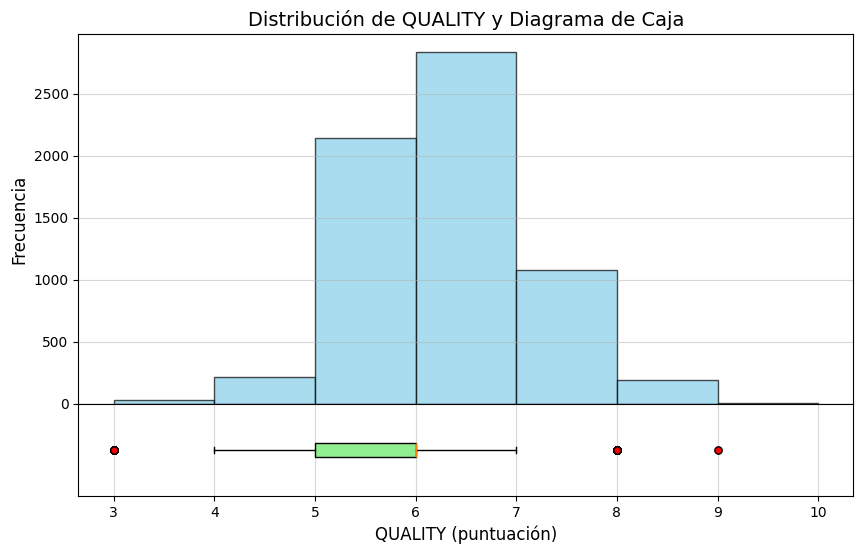

In [8]:
# Gráfico de Quality con matplotlib
fig, (ax_hist, ax_box) = plt.subplots(
    2, 1,
    sharex=True,
    figsize=(10, 6),
    gridspec_kw={'height_ratios': [4, 1]}
)

fig.subplots_adjust(hspace=0)

# Histograma de QUALITY (Superior)
ax_hist.hist(
    wine_data['quality'].dropna(),
    bins=range(int(wine_data['quality'].min()), int(wine_data['quality'].max()) + 2),
    color='skyblue',
    edgecolor='black',
    alpha=0.7
)
ax_hist.set_title('Distribución de QUALITY y Diagrama de Caja', fontsize=14)
ax_hist.set_ylabel('Frecuencia', fontsize=12)
ax_hist.grid(axis='y', alpha=0.5)
ax_hist.tick_params(axis="x", labelbottom=False)

# Box Plot de QUALITY (Inferior)
ax_box.boxplot(
    wine_data['quality'].dropna(),
    vert=False,
    patch_artist=True,
    boxprops=dict(facecolor='lightgreen', color='black'),
    flierprops=dict(marker='o', markersize=5, markerfacecolor='red', alpha=0.5)
)
ax_box.set_xlabel('QUALITY (puntuación)', fontsize=12)
ax_box.set_yticks([])
ax_box.grid(axis='x', alpha=0.5)

plt.show()

**Usando SEABORN**

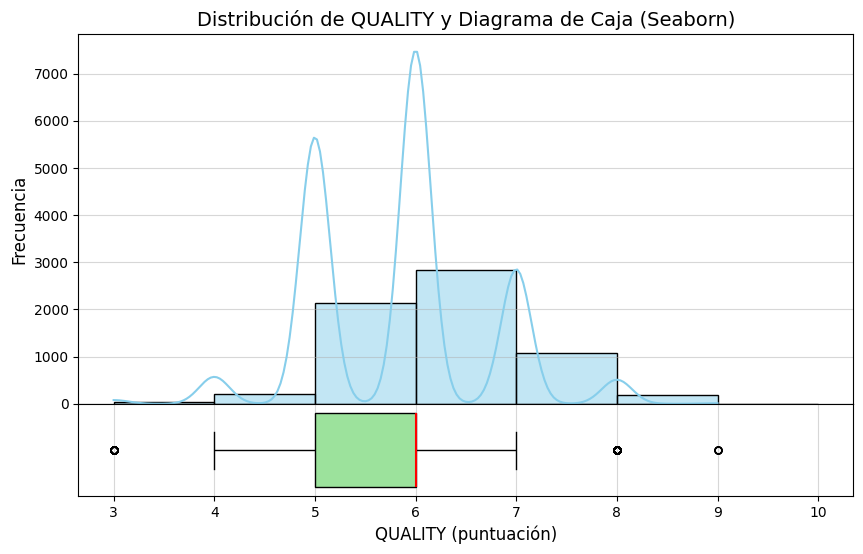

In [9]:
quality_data = wine_data['quality'].dropna()

fig, (ax_hist, ax_box) = plt.subplots(
    2, 1,
    sharex=True,
    figsize=(10, 6),
    gridspec_kw={'height_ratios': [4, 1]}
)

fig.subplots_adjust(hspace=0)

# Histograma de QUALITY (Superior) usando sns.histplot
sns.histplot(
    x=quality_data,
    ax=ax_hist,
    bins=range(int(quality_data.min()), int(quality_data.max()) + 2),
    color='skyblue',
    edgecolor='black',
    kde=True
)
ax_hist.set_title('Distribución de QUALITY y Diagrama de Caja (Seaborn)', fontsize=14)
ax_hist.set_ylabel('Frecuencia', fontsize=12)
ax_hist.set_xlabel('')
ax_hist.grid(axis='y', alpha=0.5)
ax_hist.tick_params(axis="x", labelbottom=False)

# Box Plot de QUALITY (Inferior) usando sns.boxplot
sns.boxplot(
    x=quality_data,
    ax=ax_box,
    color='lightgreen',
    fliersize=5,
    linecolor='black',
    medianprops={'color': 'red', 'linewidth': 1.5}
)

ax_box.set_xlabel('QUALITY (puntuación)', fontsize=12)
ax_box.set_yticks([])
ax_box.grid(axis='x', alpha=0.5)

plt.show()

### Trabajo para la Columna ALCOHOL

Se procederá a analizar el estado del atributo ALCOHOL generando la siguiente información.

#### Con Pandas

In [10]:
wine_data['alcohol'] = pd.to_numeric(wine_data['alcohol'], errors='coerce')
nan_count_alcohol = wine_data['alcohol'].isna().sum()
print(f"Cantidad total de líneas: {len(wine_data)}")
print(f"Cantidad de valores NaN en la columna 'ALCOHOL': {nan_count_alcohol}")
print(f"Cantidad de valores en la columna 'ALCOHOL': {len(wine_data) - nan_count_alcohol}")
print(f"Porcentaje de valores NaN en la columna 'ALCOHOL': {nan_count_alcohol / len(wine_data) * 100:.4f}%")
print(f"Valor máximo: {wine_data['alcohol'].max():.2f}")
print(f"Valor mínimo: {wine_data['alcohol'].min():.2f}")
print(f"Media del ALCOHOL: {wine_data['alcohol'].mean():.2f}")
print(f"Mediana del ALCOHOL: {wine_data['alcohol'].median():.2f}")
print(f"Moda del ALCOHOL: {wine_data['alcohol'].mode()[0]:.2f}")
print(f"Desviación estándar del ALCOHOL: {wine_data['alcohol'].std():.2f}")
print(f"Percentil 25 del ALCOHOL: {wine_data['alcohol'].quantile(0.25):.2f}")
print(f"Percentil 75 del ALCOHOL: {wine_data['alcohol'].quantile(0.75):.2f}")

Cantidad total de líneas: 6497
Cantidad de valores NaN en la columna 'ALCOHOL': 0
Cantidad de valores en la columna 'ALCOHOL': 6497
Porcentaje de valores NaN en la columna 'ALCOHOL': 0.0000%
Valor máximo: 14.90
Valor mínimo: 8.00
Media del ALCOHOL: 10.49
Mediana del ALCOHOL: 10.30
Moda del ALCOHOL: 9.50
Desviación estándar del ALCOHOL: 1.19
Percentil 25 del ALCOHOL: 9.50
Percentil 75 del ALCOHOL: 11.30


#### Con Polars

In [11]:
df_processed_alcohol = wine_data_pl.with_columns(
    pl.col('alcohol').cast(pl.Float64, strict=False).alias('ALCOHOL_NUMERIC')
)
alcohol_col = 'ALCOHOL_NUMERIC'

total_lines = df_processed_alcohol.height

stats_df_alcohol = df_processed_alcohol.select(
    nan_count = pl.col(alcohol_col).is_null().sum(),
    max_val = pl.col(alcohol_col).max(),
    min_val = pl.col(alcohol_col).min(),
    mean_val = pl.col(alcohol_col).mean(),
    median_val = pl.col(alcohol_col).median(),
    std_val = pl.col(alcohol_col).std(),
    p25_val = pl.col(alcohol_col).quantile(0.25),
    p75_val = pl.col(alcohol_col).quantile(0.75),
    mode_val = pl.col(alcohol_col).mode().first()
).row(0)

nan_count = stats_df_alcohol[0]
max_val = stats_df_alcohol[1]
min_val = stats_df_alcohol[2]
mean_val = stats_df_alcohol[3]
median_val = stats_df_alcohol[4]
std_val = stats_df_alcohol[5]
p25_val = stats_df_alcohol[6]
p75_val = stats_df_alcohol[7]
mode_val = stats_df_alcohol[8]

valid_count = total_lines - nan_count
nan_percentage = (nan_count / total_lines) * 100

print(f"Cantidad total de líneas: {total_lines}")
print(f"Cantidad de valores NaN en la columna 'ALCOHOL': {nan_count}")
print(f"Cantidad de valores en la columna 'ALCOHOL': {valid_count}")
print(f"Porcentaje de valores NaN en la columna 'ALCOHOL': {nan_percentage:.4f}%")
print(f"Valor máximo: {max_val:.2f}")
print(f"Valor mínimo: {min_val:.2f}")
print(f"Media del ALCOHOL: {mean_val:.2f}")
print(f"Mediana del ALCOHOL: {median_val:.2f}")
print(f"Moda del ALCOHOL: {mode_val:.2f}" if mode_val is not None else "Moda del ALCOHOL: N/A")
print(f"Desviación estándar del ALCOHOL: {std_val:.2f}")
print(f"Percentil 25 del ALCOHOL: {p25_val:.2f}")
print(f"Percentil 75 del ALCOHOL: {p75_val:.2f}")

Cantidad total de líneas: 6497
Cantidad de valores NaN en la columna 'ALCOHOL': 0
Cantidad de valores en la columna 'ALCOHOL': 6497
Porcentaje de valores NaN en la columna 'ALCOHOL': 0.0000%
Valor máximo: 14.90
Valor mínimo: 8.00
Media del ALCOHOL: 10.49
Mediana del ALCOHOL: 10.30
Moda del ALCOHOL: 9.50
Desviación estándar del ALCOHOL: 1.19
Percentil 25 del ALCOHOL: 9.50
Percentil 75 del ALCOHOL: 11.30


### Gráfico de Alcohol

**Utilizando matplotlib**

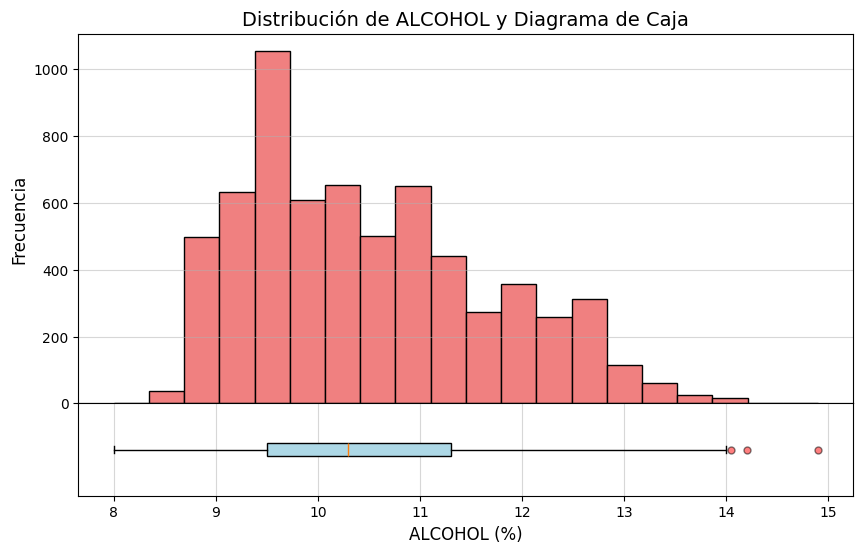

In [12]:
fig, (ax_hist, ax_box) = plt.subplots(
    2, 1,
    sharex=True,
    figsize=(10, 6),
    gridspec_kw={'height_ratios': [4, 1]}
)

fig.subplots_adjust(hspace=0)

# Histograma de ALCOHOL (Superior)
ax_hist.hist(
    wine_data['alcohol'].dropna(),
    bins=20,
    color='lightcoral',
    edgecolor='black'
)
ax_hist.set_title('Distribución de ALCOHOL y Diagrama de Caja', fontsize=14)
ax_hist.set_ylabel('Frecuencia', fontsize=12)
ax_hist.grid(axis='y', alpha=0.5)
ax_hist.tick_params(axis="x", labelbottom=False)

# Box Plot de ALCOHOL (Inferior)
ax_box.boxplot(
    wine_data['alcohol'].dropna(),
    vert=False,
    patch_artist=True,
    boxprops=dict(facecolor='lightblue', color='black'),
    flierprops=dict(marker='o', markersize=5, markerfacecolor='red', alpha=0.5)
)
ax_box.set_xlabel('ALCOHOL (%)', fontsize=12)
ax_box.set_yticks([])
ax_box.grid(axis='x', alpha=0.5)

plt.show()

### Trabajo para la Columna COLOR

Análisis de la variable categórica COLOR (red/white)

=== ANÁLISIS DE LA VARIABLE COLOR ===
Cantidad total de líneas: 6497
Cantidad de valores NaN en la columna 'COLOR': 0
Cantidad de valores en la columna 'COLOR': 6497
Porcentaje de valores NaN en la columna 'COLOR': 0.0000%

Distribución de colores:
color
white    4898
red      1599
Name: count, dtype: int64

Porcentajes por color:
White: 75.39%
Red: 24.61%


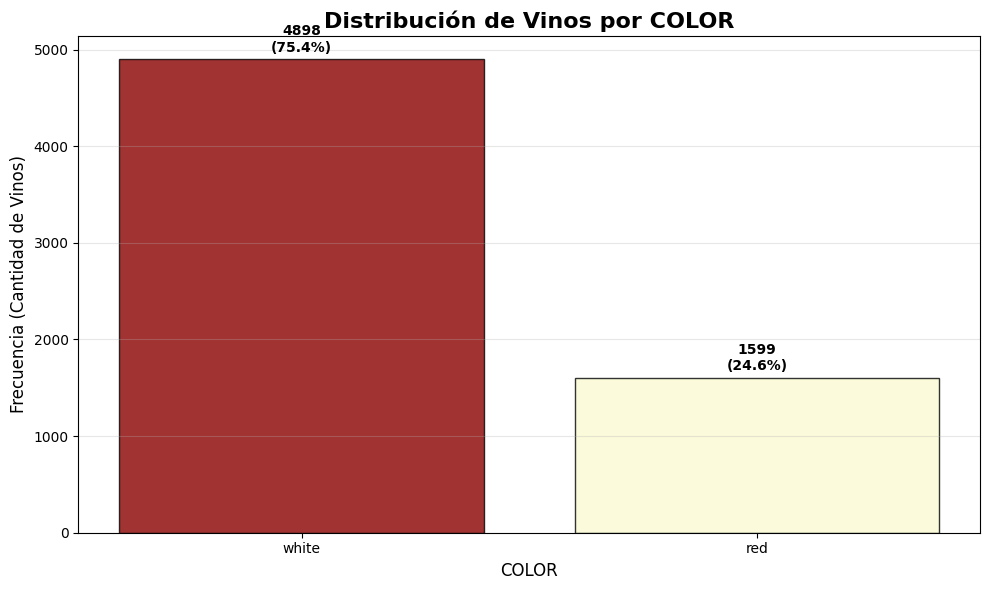


=== DATASETS SEPARADOS CREADOS ===
Vinos tintos: 1599 muestras
Vinos blancos: 4898 muestras

Ahora puedes usar 'red_wines' y 'white_wines' para análisis separados

=== NOMBRES EXACTOS DE LAS COLUMNAS ===
Columnas numéricas disponibles:
 1. 'fixed acidity'
 2. 'volatile acidity'
 3. 'citric acid'
 4. 'residual sugar'
 5. 'chlorides'
 6. 'free sulfur dioxide'
 7. 'total sulfur dioxide'
 8. 'density'
 9. 'pH'
10. 'sulphates'
11. 'alcohol'
12. 'quality'
13. 'color'

NOTA: Los nombres de columnas tienen ESPACIOS, no guiones bajos.
Ejemplo correcto: wine_data['volatile acidity']
Ejemplo incorrecto: wine_data['volatile_acidity']

=== MAPEO DE NOMBRES DE COLUMNAS ===
Puedes usar este mapeo para facilitar el acceso:
'fixed_acidity' -> 'fixed acidity'
'volatile_acidity' -> 'volatile acidity'
'citric_acid' -> 'citric acid'
'residual_sugar' -> 'residual sugar'
'chlorides' -> 'chlorides'
'free_sulfur_dioxide' -> 'free sulfur dioxide'
'total_sulfur_dioxide' -> 'total sulfur dioxide'
'density' -> 'd

In [13]:
print("=== ANÁLISIS DE LA VARIABLE COLOR ===")

# Verificar valores nulos
nan_count_color = wine_data['color'].isna().sum()
print(f"Cantidad total de líneas: {len(wine_data)}")
print(f"Cantidad de valores NaN en la columna 'COLOR': {nan_count_color}")
print(f"Cantidad de valores en la columna 'COLOR': {len(wine_data) - nan_count_color}")
print(f"Porcentaje de valores NaN en la columna 'COLOR': {nan_count_color / len(wine_data) * 100:.4f}%")

# Distribución de colores
print("\nDistribución de colores:")
color_counts = wine_data['color'].value_counts()
print(color_counts)

# Porcentajes
print("\nPorcentajes por color:")
color_percentages = wine_data['color'].value_counts(normalize=True) * 100
for color, percentage in color_percentages.items():
    print(f"{color.capitalize()}: {percentage:.2f}%")

# Gráfico de barras para COLOR
plt.figure(figsize=(10, 6))
bars = plt.bar(
    color_counts.index,
    color_counts.values,
    color=['darkred', 'lightgoldenrodyellow'],
    edgecolor='black',
    alpha=0.8
)

plt.title('Distribución de Vinos por COLOR', fontsize=16, fontweight='bold')
plt.xlabel('COLOR', fontsize=12)
plt.ylabel('Frecuencia (Cantidad de Vinos)', fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Añadir etiquetas de conteo y porcentaje
for bar, color in zip(bars, color_counts.index):
    yval = bar.get_height()
    percentage = color_percentages[color]
    plt.text(bar.get_x() + bar.get_width()/2, yval + 50, 
             f'{int(yval)}\n({percentage:.1f}%)', 
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Crear datasets separados para análisis individual
red_wines = wine_data[wine_data['color'] == 'red'].copy()
white_wines = wine_data[wine_data['color'] == 'white'].copy()

print(f"\n=== DATASETS SEPARADOS CREADOS ===")
print(f"Vinos tintos: {len(red_wines)} muestras")
print(f"Vinos blancos: {len(white_wines)} muestras")
print(f"\nAhora puedes usar 'red_wines' y 'white_wines' para análisis separados")

# Mostrar los nombres exactos de las columnas para referencia
print(f"\n=== NOMBRES EXACTOS DE LAS COLUMNAS ===")
print("Columnas numéricas disponibles:")
for i, col in enumerate(wine_data.columns, 1):
    print(f"{i:2d}. '{col}'")
    
print("\nNOTA: Los nombres de columnas tienen ESPACIOS, no guiones bajos.")
print("Ejemplo correcto: wine_data['volatile acidity']")
print("Ejemplo incorrecto: wine_data['volatile_acidity']")

# Crear un diccionario para facilitar el acceso a las columnas
column_mapping = {
    'fixed_acidity': 'fixed acidity',
    'volatile_acidity': 'volatile acidity', 
    'citric_acid': 'citric acid',
    'residual_sugar': 'residual sugar',
    'chlorides': 'chlorides',
    'free_sulfur_dioxide': 'free sulfur dioxide',
    'total_sulfur_dioxide': 'total sulfur dioxide',
    'density': 'density',
    'pH': 'pH',
    'sulphates': 'sulphates',
    'alcohol': 'alcohol',
    'quality': 'quality',
    'color': 'color'
}

print("\n=== MAPEO DE NOMBRES DE COLUMNAS ===")
print("Puedes usar este mapeo para facilitar el acceso:")
for short_name, full_name in column_mapping.items():
    print(f"'{short_name}' -> '{full_name}'")
    
print("\nEjemplo de uso: wine_data[column_mapping['volatile_acidity']]")

### Análisis Comparativo: Vinos Tintos vs Blancos

=== ANÁLISIS COMPARATIVO DE CALIDAD POR COLOR ===

Estadísticas de CALIDAD por COLOR:
        count      mean       std  min  25%  50%  75%  max
color                                                     
red    1599.0  5.636023  0.807569  3.0  5.0  6.0  6.0  8.0
white  4898.0  5.877909  0.885639  3.0  5.0  6.0  6.0  9.0

Distribución de CALIDAD por COLOR:
quality   3    4     5     6    7    8  9
color                                    
red      10   53   681   638  199   18  0
white    20  163  1457  2198  880  175  5


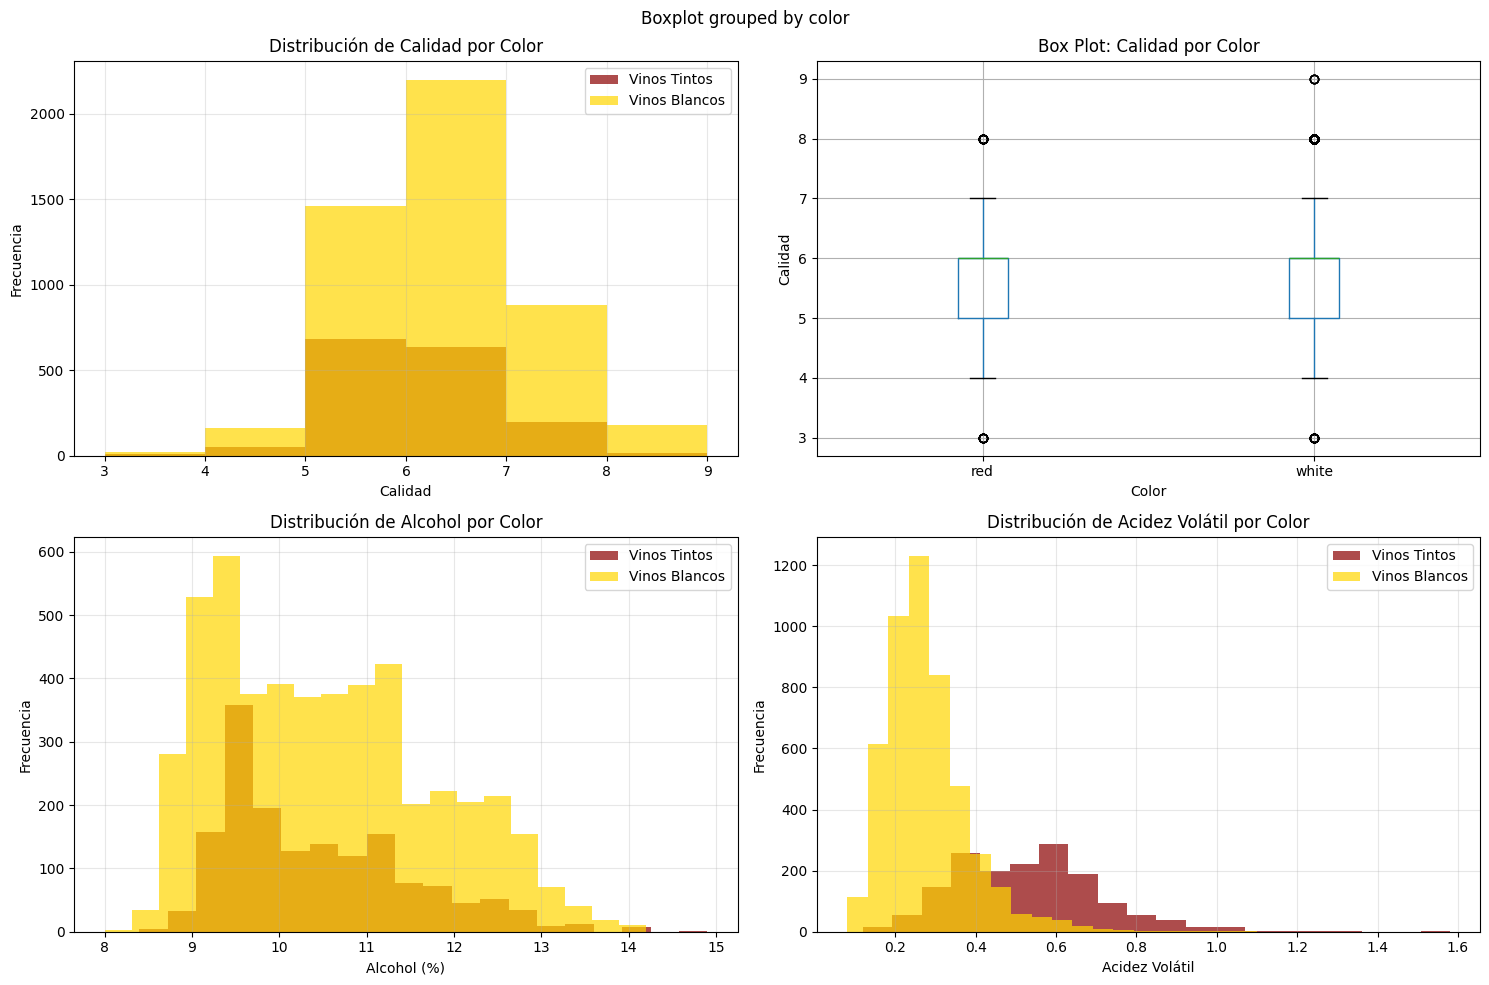


=== DIFERENCIAS CLAVE ENTRE VINOS TINTOS Y BLANCOS ===
                      Vinos_Tintos_Media  Vinos_Blancos_Media  Diferencia  \
total sulfur dioxide              46.468              138.361     -91.893   
free sulfur dioxide               15.875               35.308     -19.433   
residual sugar                     2.539                6.391      -3.853   
fixed acidity                      8.320                6.855       1.465   
volatile acidity                   0.528                0.278       0.250   
sulphates                          0.658                0.490       0.168   
pH                                 3.311                3.188       0.123   
alcohol                           10.423               10.514      -0.091   
citric acid                        0.271                0.334      -0.063   
chlorides                          0.087                0.046       0.042   
density                            0.997                0.994       0.003   

                   

In [18]:
# Análisis comparativo de calidad por color
print("=== ANÁLISIS COMPARATIVO DE CALIDAD POR COLOR ===")

# Estadísticas de calidad por color
print("\nEstadísticas de CALIDAD por COLOR:")
quality_by_color = wine_data.groupby('color')['quality'].describe()
print(quality_by_color)

# Distribución de calidad por color
print("\nDistribución de CALIDAD por COLOR:")
quality_distribution = wine_data.groupby(['color', 'quality']).size().unstack(fill_value=0)
print(quality_distribution)

# Gráfico comparativo
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Histograma de calidad por color
axes[0, 0].hist(red_wines['quality'], bins=range(3, 10), alpha=0.7, label='Vinos Tintos', color='darkred')
axes[0, 0].hist(white_wines['quality'], bins=range(3, 10), alpha=0.7, label='Vinos Blancos', color='gold')
axes[0, 0].set_title('Distribución de Calidad por Color')
axes[0, 0].set_xlabel('Calidad')
axes[0, 0].set_ylabel('Frecuencia')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Box plot de calidad por color
wine_data.boxplot(column='quality', by='color', ax=axes[0, 1])
axes[0, 1].set_title('Box Plot: Calidad por Color')
axes[0, 1].set_xlabel('Color')
axes[0, 1].set_ylabel('Calidad')

# Comparación de alcohol por color
axes[1, 0].hist(red_wines['alcohol'], bins=20, alpha=0.7, label='Vinos Tintos', color='darkred')
axes[1, 0].hist(white_wines['alcohol'], bins=20, alpha=0.7, label='Vinos Blancos', color='gold')
axes[1, 0].set_title('Distribución de Alcohol por Color')
axes[1, 0].set_xlabel('Alcohol (%)')
axes[1, 0].set_ylabel('Frecuencia')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# Comparación de acidez volátil por color
axes[1, 1].hist(red_wines['volatile acidity'], bins=20, alpha=0.7, label='Vinos Tintos', color='darkred')
axes[1, 1].hist(white_wines['volatile acidity'], bins=20, alpha=0.7, label='Vinos Blancos', color='gold')
axes[1, 1].set_title('Distribución de Acidez Volátil por Color')
axes[1, 1].set_xlabel('Acidez Volátil')
axes[1, 1].set_ylabel('Frecuencia')
axes[1, 1].legend()
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Mostrar diferencias clave entre vinos tintos y blancos
print("\n=== DIFERENCIAS CLAVE ENTRE VINOS TINTOS Y BLANCOS ===")
numeric_columns = wine_data.select_dtypes(include=[np.number]).columns.drop('quality')

comparison_stats = pd.DataFrame({
    'Vinos_Tintos_Media': red_wines[numeric_columns].mean(),
    'Vinos_Blancos_Media': white_wines[numeric_columns].mean()
})
comparison_stats['Diferencia'] = comparison_stats['Vinos_Tintos_Media'] - comparison_stats['Vinos_Blancos_Media']
comparison_stats['Diferencia_Abs'] = abs(comparison_stats['Diferencia'])

# Ordenar por diferencia absoluta
comparison_stats = comparison_stats.sort_values('Diferencia_Abs', ascending=False)
print(comparison_stats.round(3))

### Análisis de Correlación

Matriz de correlación entre las variables numéricas

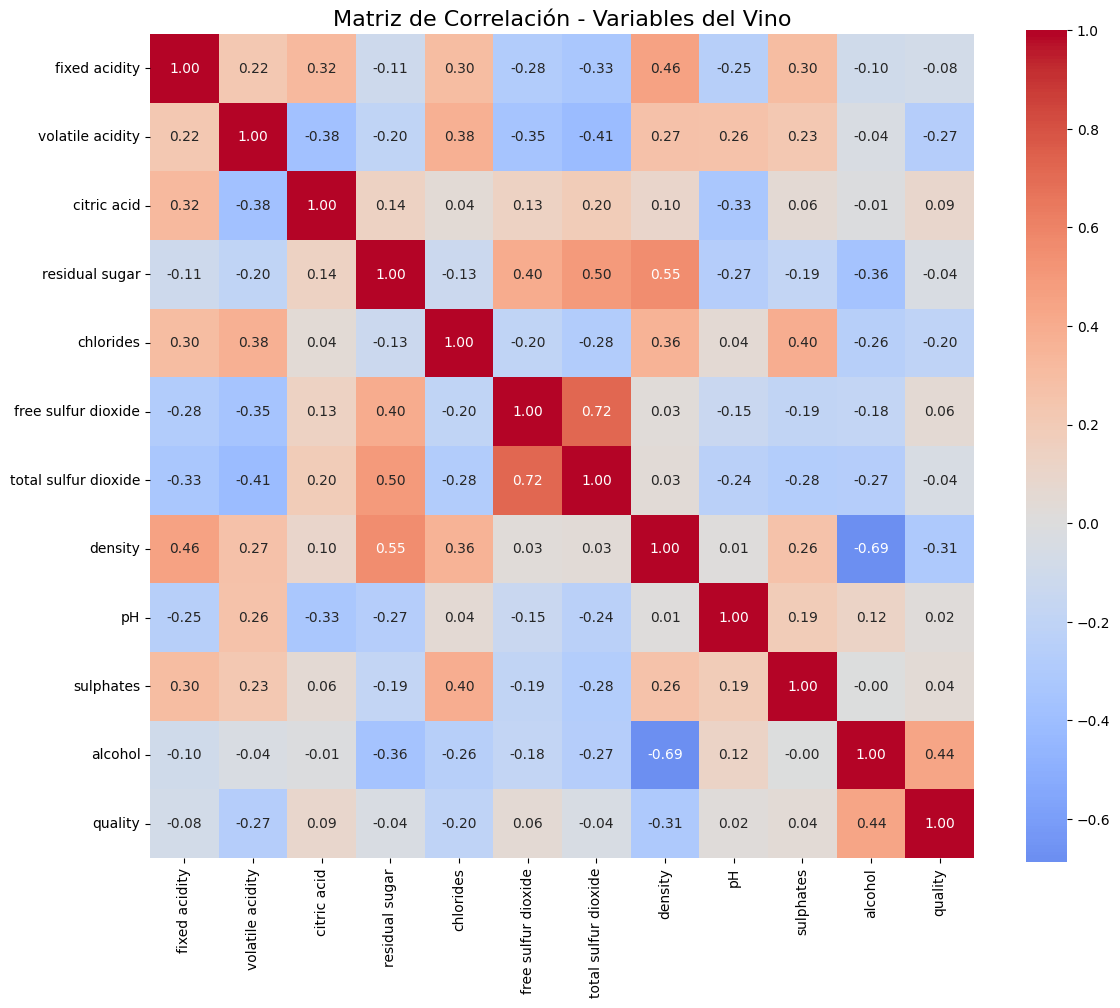


Correlaciones más fuertes con QUALITY:
alcohol                 0.444319
density                 0.305858
volatile acidity        0.265699
chlorides               0.200666
citric acid             0.085532
fixed acidity           0.076743
free sulfur dioxide     0.055463
total sulfur dioxide    0.041385
sulphates               0.038485
residual sugar          0.036980
pH                      0.019506
Name: quality, dtype: float64


In [19]:
# Matriz de correlación
numeric_columns = wine_data.select_dtypes(include=[np.number]).columns
correlation_matrix = wine_data[numeric_columns].corr()

# Visualización con seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            square=True,
            fmt='.2f')
plt.title('Matriz de Correlación - Variables del Vino', fontsize=16)
plt.tight_layout()
plt.show()

# Correlaciones más fuertes con quality
quality_correlations = correlation_matrix['quality'].abs().sort_values(ascending=False)
print("\nCorrelaciones más fuertes con QUALITY:")
print(quality_correlations[1:])  # Excluir la correlación consigo mismo

### Análisis de Quality por Características Principales

Análisis de cómo las características principales afectan la calidad del vino

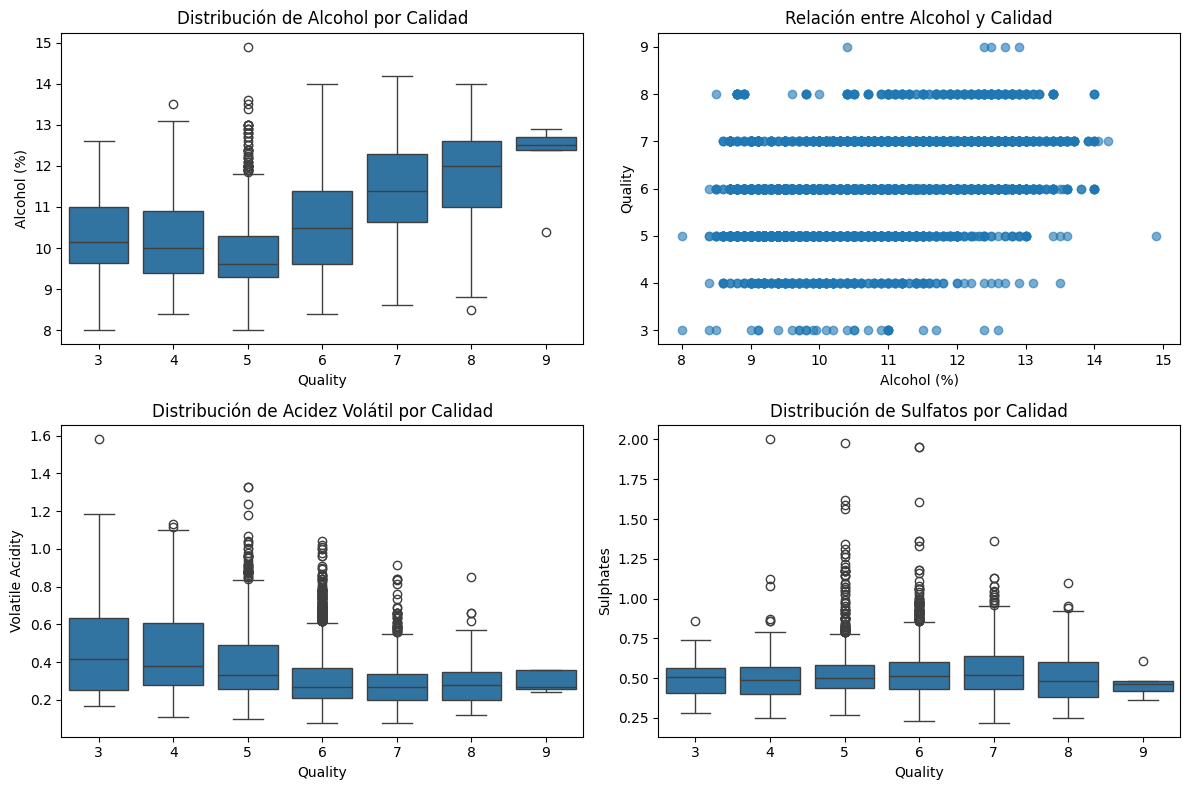

In [20]:
# Análisis de Quality vs Alcohol
plt.figure(figsize=(12, 8))

# Subplot 1: Boxplot Quality vs Alcohol
plt.subplot(2, 2, 1)
sns.boxplot(data=wine_data, x='quality', y='alcohol')
plt.title('Distribución de Alcohol por Calidad')
plt.xlabel('Quality')
plt.ylabel('Alcohol (%)')

# Subplot 2: Scatterplot Quality vs Alcohol
plt.subplot(2, 2, 2)
plt.scatter(wine_data['alcohol'], wine_data['quality'], alpha=0.6)
plt.title('Relación entre Alcohol y Calidad')
plt.xlabel('Alcohol (%)')
plt.ylabel('Quality')

# Subplot 3: Boxplot Quality vs Volatile Acidity
plt.subplot(2, 2, 3)
sns.boxplot(data=wine_data, x='quality', y='volatile acidity')
plt.title('Distribución de Acidez Volátil por Calidad')
plt.xlabel('Quality')
plt.ylabel('Volatile Acidity')

# Subplot 4: Boxplot Quality vs Sulphates
plt.subplot(2, 2, 4)
sns.boxplot(data=wine_data, x='quality', y='sulphates')
plt.title('Distribución de Sulfatos por Calidad')
plt.xlabel('Quality')
plt.ylabel('Sulphates')

plt.tight_layout()
plt.show()

### Estadísticas Resumidas por Calidad

Análisis agrupado por niveles de calidad

In [21]:
# Agrupar por calidad y calcular estadísticas
quality_groups = wine_data.groupby('quality').agg({
    'alcohol': ['mean', 'median', 'std'],
    'volatile acidity': ['mean', 'median', 'std'],
    'sulphates': ['mean', 'median', 'std'],
    'pH': ['mean', 'median', 'std']
}).round(3)

print("Estadísticas por nivel de calidad:")
print(quality_groups)

# Contar registros por calidad
quality_counts = wine_data['quality'].value_counts().sort_index()
print("\nCantidad de vinos por nivel de calidad:")
print(quality_counts)

Estadísticas por nivel de calidad:
        alcohol               volatile acidity               sulphates         \
           mean median    std             mean median    std      mean median   
quality                                                                         
3        10.215  10.15  1.106            0.517  0.415  0.342     0.506  0.505   
4        10.180  10.00  0.986            0.458  0.380  0.229     0.506  0.485   
5         9.838   9.60  0.814            0.390  0.330  0.179     0.526  0.500   
6        10.588  10.50  1.126            0.314  0.270  0.147     0.533  0.510   
7        11.386  11.40  1.199            0.289  0.270  0.117     0.547  0.520   
8        11.679  12.00  1.279            0.291  0.280  0.119     0.512  0.480   
9        12.180  12.50  1.013            0.298  0.270  0.058     0.466  0.460   

                   pH                
           std   mean median    std  
quality                              
3        0.127  3.258  3.245  0.213  
4 

### CONCLUSIONES

#### Conclusiones de los datos del Wine Quality Dataset

#### Quality (Variable Target)
- La calidad del vino se distribuye principalmente entre los valores 5, 6 y 7
- Hay pocos vinos de calidad muy baja (3-4) o muy alta (8-9)
- La distribución está ligeramente sesgada hacia la derecha

#### Alcohol
- Existe una correlación positiva entre el contenido de alcohol y la calidad
- Los vinos de mayor calidad tienden a tener mayor contenido alcohólico
- No hay valores faltantes en esta variable

#### Variables Químicas
- La acidez volátil muestra una correlación negativa con la calidad
- Los sulfatos tienen una correlación positiva moderada con la calidad
- El dataset no presenta valores faltantes, lo que facilita el análisis

#### Recomendaciones para Modelado
- Considerar el desbalance en las clases de calidad al entrenar modelos
- Las variables más importantes para predecir calidad parecen ser: alcohol, acidez volátil, y sulfatos
- Podría ser útil crear categorías de calidad (baja, media, alta) para simplificar el problema de clasificación

# Parte 3 - Benchmark de Algoritmos de Machine Learning

In [5]:
import os
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # Asegurar importación para SVM
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# --- AJUSTE DE ENTORNO ---
# ELIMINAR o comentar la línea matplotlib.use('Qt5Agg') para evitar el crash del QSocketNotifier.

# --- Carga y Preparación de Datos ---
ruta = os.getcwd()
# wine_data = pd.read_csv(ruta+"/wine_data_combined.csv", sep=',', header=0) # Usar solo el nombre del archivo si está en la misma ruta
# wine_data = pd.read_csv("wine_data_combined.csv", sep=',', header=0)

X = wine_data.drop(['quality', 'color'], axis=1)
y = wine_data['quality'] # Ahora es una Serie

X = X.values  # Convierte el DataFrame de características a un array NumPy
y = y.values.ravel()  # <--- CORRECCIÓN CLAVE: Aplanar a (N,)

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Análisis de overfitting para KNN ---
K_valor = int(np.sqrt(wine_data.shape[0]))   
k_values = range(1, K_valor + 1)
train_acc_knn = []
test_acc_knn = []
for k in k_values:
    # Si la lista de k es demasiado grande para los datos (como se vio en la traza),
    # el programa fallará. Usar un rango más seguro o validar el tamaño.
    knn = KNeighborsClassifier(n_neighbors=k, weights='uniform', p=2)
    knn.fit(X_train, y_train)
    train_acc_knn.append(knn.score(X_train, y_train))
    test_acc_knn.append(knn.score(X_test, y_test))

# --- Análisis de overfitting para SVM ---
c_values = np.logspace(-2, 2, 20)
train_acc_svm = []
test_acc_svm = []
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
for c in c_values:
    svm = SVC(C=c, kernel='rbf', gamma='scale', random_state=42)
    svm.fit(X_train_scaled, y_train)
    train_acc_svm.append(svm.score(X_train_scaled, y_train))
    test_acc_svm.append(svm.score(X_test_scaled, y_test))

# --- Análisis de overfitting para RandomForestClassifier ---
depth_values = range(1, 210, 10) # Se usa un rango más pequeño y constante para evitar fallos
train_acc_rf = []
test_acc_rf = []
for depth in depth_values:
    rf = RandomForestClassifier(n_estimators=100, max_depth=depth, random_state=42, n_jobs=-1)
    rf.fit(X_train, y_train)
    train_acc_rf.append(rf.score(X_train, y_train))
    test_acc_rf.append(rf.score(X_test, y_test))

# --- 4. Análisis de overfitting para LogisticRegression (NUEVO) ---
train_acc_lr = []; test_acc_lr = []
for c in c_values:
    # Logistic Regression usa datos escalados para un mejor rendimiento de regularización
    lr = LogisticRegression(C=c, penalty='l2', solver='liblinear', max_iter=1000, random_state=42)
    lr.fit(X_train_scaled, y_train)
    train_acc_lr.append(lr.score(X_train_scaled, y_train))
    test_acc_lr.append(lr.score(X_test_scaled, y_test))
    
    

# -----------------------------------------------------------------------------
# Gráficas de overfitting (Diseño 2x2 para 4 modelos)
# -----------------------------------------------------------------------------
plt.figure(figsize=(14, 12))
# Gráfico 1: KNN
plt.subplot(2, 2, 1) 
plt.plot(k_values, train_acc_knn, label='Train')
plt.plot(k_values, test_acc_knn, label='Test')
plt.title('KNN: Accuracy vs. k')
plt.xlabel('k (n_neighbors)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Gráfico 2: SVM
plt.subplot(2, 2, 2) 
plt.plot(c_values, train_acc_svm, label='Train')
plt.plot(c_values, test_acc_svm, label='Test')
plt.xscale('log')
plt.title('SVM: Accuracy vs. C (Regularización)')
plt.xlabel('C (Regularización)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Gráfico 3: Random Forest
plt.subplot(2, 2, 3) 
plt.plot(depth_values, train_acc_rf, label='Train')
plt.plot(depth_values, test_acc_rf, label='Test')
plt.title('Random Forest: Accuracy vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.xticks(depth_values[::2])

# Gráfico 4: Logistic Regression (NUEVO)
plt.subplot(2, 2, 4) 
plt.plot(c_values, train_acc_lr, label='Train')
plt.plot(c_values, test_acc_lr, label='Test')
plt.xscale('log')
plt.title('Logistic Regression: Accuracy vs. C')
plt.xlabel('C (Inverso de Regularización)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)


plt.tight_layout()
plt.savefig('analisis_overfitting_4_modelos.png')
plt.close()

/Users/rbaltoga/Desktop/Projects/CiDatTecMod2/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
/Users/rbaltoga/Desktop/Projects/CiDatTecMod2/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
/Users/rbaltoga/Desktop/Projects/CiDatTecMod2/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclas